In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The purpose of this excercise is to explore the factors that can help us predict the chances of having average annual income of more than 50K. The relevant variables in this study are : occupation,education and age. 

In [2]:
name = ['age','workclass','fnlwgt','education','education_num','marital','occupation','relationship','race','sex','capital_gain'
        ,'capital_loss','hours_per_week','native_country','inc_cat','cat']
inc = pd.read_csv('adult.csv',index_col = False, names = name)
inc.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
dtype: int64

In [73]:
#inc.occupation.value_counts().head(2)
#inc.education.value_counts().head(2)
inc.age.value_counts().head(2)

36    898
31    888
dtype: int64

# TO FIND THE DISTRIBUTION OF OCCUPATION ACROSS ALL INCOME    CATEGORY

In [3]:
occ = inc.occupation.value_counts()
k = pd.Series(((occ/sum(occ))*100))
k

 Prof-specialty       12.714597
 Craft-repair         12.588680
 Exec-managerial      12.487331
 Adm-clerical         11.578268
 Sales                11.209729
 Other-service        10.119468
 Machine-op-inspct     6.148460
 ?                     5.660146
 Transport-moving      4.904641
 Handlers-cleaners     4.207487
 Farming-fishing       3.052732
 Tech-support          2.850035
 Protective-serv       1.993182
 Priv-house-serv       0.457603
 Armed-Forces          0.027640
dtype: float64

In [4]:
# to regroup the number of categories in Occupation 
inc1 = inc.replace({'occupation':[' Prof-specialty',' Craft-repair',' Exec-managerial',' Adm-clerical',' Sales',' Other-service',' Protective-serv',
' Priv-house-serv',' Machine-op-inspct',' ?',' Armed-Forces',' Transport-moving',
' Handlers-cleaners',' Farming-fishing',' Tech-support']}  
,{'occupation':['Prof-specialty','Craft-repair','Exec-managerial','Adm-clerical',
  'Sales','Other-service','Other-service','Other-service','Machine-op-inspct',
   'Other','Other','Transport-moving','Handlers-cleaners','Farming-fishing',
   'Tech-support']})
inc1.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Other-service        4093
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Machine-op-inspct    2002
Other                1852
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
dtype: int64

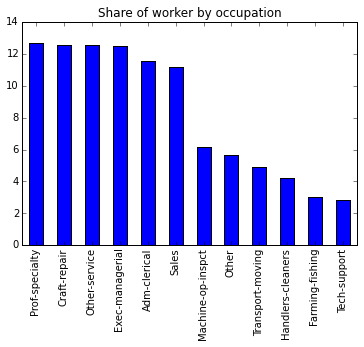

In [9]:
# to plot the shares of different profession in the sample 
occ = inc1.occupation.value_counts()
k = pd.Series(((occ/sum(occ))*100), name = ' ')
k.plot(kind = 'bar',title = 'Share of worker by occupation')

In [11]:
# to group the data by occupation and then unstack it
inc2 = inc1.groupby(['occupation']).cat.value_counts()
inc3 = inc2.unstack('occupation').T
inc3

,0,1
occupation,,
Adm-clerical,3263,507
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other,1660,192
Other-service,3744,349
Prof-specialty,2281,1859


In the following code i tried to investigate the share of different income categories across different profession. It is observed that if an individual has a profession related to either 'Executive Managerial' or 'Special Professionals' than there is a high chance of having income more than 50K

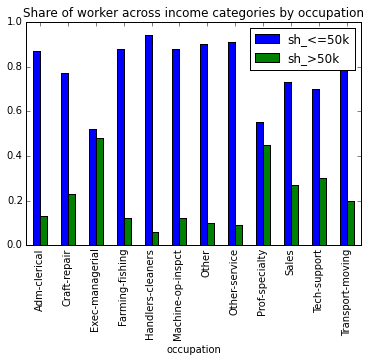

In [13]:
# to calculate the share of income category (i.e. 0 and 1) by occupation
#inc3.apply(lambda c:c/c.sum()*100,axis = 1).plot(kind = 'bar')

inc3['sum'] = inc3[0] + inc3[1]
inc3['sh_<=50k'] = np.round((inc3[0]/inc3['sum']),2)
inc3['sh_>50k'] = 1 - inc3['sh_<=50k']
inc3[['sh_<=50k','sh_>50k']].plot(kind = 'bar',title = 'Share of worker across income categories by occupation')

From the above table, we see that 'Exec-manegerial' and 'Prof-speciality' are two occupation where the proportion of worker having an income over 50k relatively higher than the rest.

In the following code i tried to investigate the share of different income categories across different profession. It is observed that for occupation in 'Executive Managerial' or 'Special Professionals' the difference between the proportion of worker earning at most 50k and above 50k is the smallest.

An interesting inference can be drawn to find whether the difference in the population proportion between two income categories is significant in population or not.In this case, the inference will of two proportions for paired sample.

S.E(p0 - p1) = sqrt(((p0 + p1)- (p0 - p1)^2)/n) where n is the number of samples for the specific occupation category

For 99%(two-tail) z = 2.57

M.E of (p0 - p1): 2.57*S.E(p0 - p1)

C.I: (p0 - p1) +- M.E

Null Hypothesis: p0 = p1 in population
Alternative Hypothesis: p0 not equal to p1 in population

S.E_tilda(p0 - p1) =  sqrt((p0 + p1)/n)

z-statistic = (p0 - p1)/S.E_tilda(p0 - p1) = (n_0 - n_1)/sqrt(n_0 + n_1)

For occupation:'Exec-manegerial'  

In [39]:
p0 = 0.52
p1 = 0.48
n= 4066
SE = np.sqrt(((p0 + p1)- (p0 - p1)**2)/n)
print('The standard error for confidence interval:',SE)

ME = 2.57*SE
print('Margin of error:',ME)

CI = ((p0 - p1)-ME, (p0 - p1)+ME)
print('Confidence interval:', CI)



The standard error for confidence interval: 0.0156699856594
Margin of error: 0.0307131718924
Confidence interval: (0.0092868281075844869, 0.070713171892415577)


In [41]:
#hypothesis testing
SE_tilda = np.sqrt((p0 + p1)/n)
print('The standard error for confidence interval:',SE_tilda)
n_0 = 2098
n_1 = 1968

z1 = (n_0 - n_1)/np.sqrt(n_0 + n_1)
print('z-statistic:', z1)

The standard error for confidence interval: 0.0156825367112
z-statistic: 2.03872977246


According to the hypothesis test result at 1% level of significance(two-tail), we fail to reject Null hypothesis as z > z1. That is in the population there exists no statistically significant difference between the proportion of workers for two different income category

For occupation:'Prof-speciality' 

In [42]:
p0 = 0.55
p1 = 0.45
n= 4140
SE = np.sqrt(((p0 + p1)- (p0 - p1)**2)/n)
print('The standard error for confidence interval:',SE)

ME = 2.57*SE
print('Margin of error:',ME)

CI = ((p0 - p1)-ME, (p0 - p1)+ME)
print('Confidence interval:', CI)

The standard error for confidence interval: 0.0154638428207
Margin of error: 0.0397420760491
Confidence interval: (0.060257923950859722, 0.13974207604914035)


In [43]:
#hypothesis testing
SE_tilda = np.sqrt((p0 + p1)/n)
print('The standard error for confidence interval:',SE_tilda)
n_0 = 2281
n_1 = 1859

z1 = (n_0 - n_1)/np.sqrt(n_0 + n_1)
print('z-statistic:', z1)

The standard error for confidence interval: 0.015541746804
z-statistic: 6.55861715129


According to the hypothesis test result at 1% level of significance(two-tail), we reject Null hypothesis as z < z1. That is in the population there exists statistically significant difference between the proportion of workers for two different income category

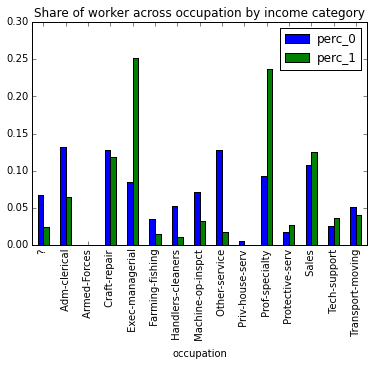

In [21]:
#to calculate the share of different profession by income category
inc2 = inc1.groupby(['occupation']).cat.value_counts()
inc3 = inc2.unstack('occupation').T
inc3['perc_0']= inc3[0]/inc3[0].sum() 
inc3['perc_1']= inc3[1]/inc3[1].sum() 

inc4 = inc3[['perc_0','perc_1']].plot(kind = 'bar',title = 'Share of worker across occupation by income category')


# TO FIND THE DISTRIBUTION OF EDUCATION ACROSS ALL INCOME CATEGORY

In [14]:
inc1 = inc.replace({'education':[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',
' 10th',' 11th',' 12th',' Prof-school',' HS-grad',' Assoc-voc',' Assoc-acdm',' Some-college',' Bachelors',' Masters',' Doctorate']}  
,{'education':['School','School','School','School','School','School','School','School','School',
'School','College','College','College','College','Postcollege','Postcollege']})
inc1.education.value_counts()

School         15330
College        15095
Postcollege     2136
dtype: int64

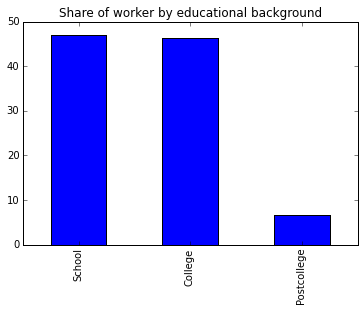

In [16]:
edu = inc1.education.value_counts()
k = pd.Series(((edu/sum(edu))*100))
k.plot(kind = 'bar', title = 'Share of worker by educational background')

In [17]:
inc2 = inc1.groupby(['education']).cat.value_counts()
inc3 = inc2.unstack('education').T
inc3

,0,1
education,,
College,10861,4234
Postcollege,871,1265
School,12988,2342


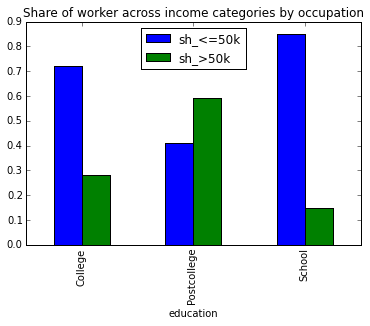

In [19]:
# to calculate the share of income category (i.e. 0 and 1) by education
#inc3.apply(lambda c:c/c.sum()*100,axis = 1).plot(kind = 'bar')
inc3['sum'] = inc3[0] + inc3[1]
inc3['sh_<=50k'] = np.round((inc3[0]/inc3['sum']),2)
inc3['sh_>50k'] = 1 - inc3['sh_<=50k']
inc3[['sh_<=50k','sh_>50k']].plot(kind = 'bar', title = 'Share of worker across income categories by occupation')

Null hypothesis: At the population level,there is no statistically significant difference in the proportion of worker earning >50k with educational qualification as school or college 

Alternative hypothesis: At the population level,there exists a statistically significant difference in the proportion of worker earning >50k with educational qualification as school or college

Compute margin of error, confidence interval

Margin of error: z(alpha = 1%)*SE

SE = sqrt((p_b_call(1-p_b_call)/n_b + (p_w_call(1-p_w_call)/n_w)

z(alpha = 1%) = 2.57 (two-tail test)

CI = ((p_w_call - p_b_call)- me,(p_w_call - p_b_call)+ me)

In [55]:
n_s = 15330
n_c = 15095
p_s = 0.15
p_c = 0.28

SE = np.sqrt(p_s*(1-p_s)/n_s + p_c*(1-p_c)/n_c)
print('Standard error:', SE)
           
ME = 2.57*SE
print('Margin of Error:', ME)
           
CI = ((p_c - p_s) - ME,(p_c - p_s) + ME )    
print('Confidence Interval:',CI)
           

Standard error: 0.00465536691796
Margin of Error: 0.0119642929792
Confidence Interval: (0.11803570702083184, 0.14196429297916824)


In [56]:
p = (2342+4234)/(15330+15095)

SE_tilda = np.sqrt(p*(1-p)/n_s + p*(1-p)/n_c)
print('Standard Error is:',round(SE_tilda,4))

z1 = (p_c - p_s)/SE_tilda
print('Z-statistic:',round(z1,2))

Standard Error is: 0.0047
Z-statistic: 27.54


According to the hypothesis test result at 1% level of significance(two-tail), we reject Null hypothesis as z < z1. That is in the population there exists statistically significant difference between the proportion of workers with different educational background who earns more than 50k

In the following code i tried to investigate the role of education on income by income category. I observe that if an individual belongs to the income category of more than 50K then there is a high chance that he had either a college degree or a post college degree

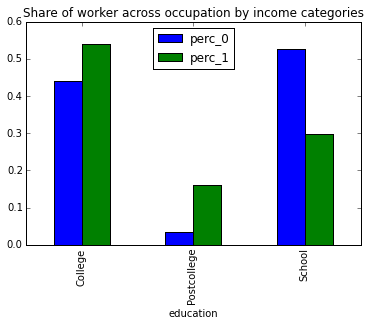

In [20]:
#to calculate the share of different profession by income category
inc2 = inc1.groupby(['education']).cat.value_counts()
inc3 = inc2.unstack('education').T
inc3['perc_0']= inc3[0]/inc3[0].sum() 
inc3['perc_1']= inc3[1]/inc3[1].sum() 

inc4 = inc3[['perc_0','perc_1']].plot(kind = 'bar',title = 'Share of worker across occupation by income category ')

# TO FIND THE DISTRIBUTION OF AGE ACROSS ALL INCOME CATEGORY

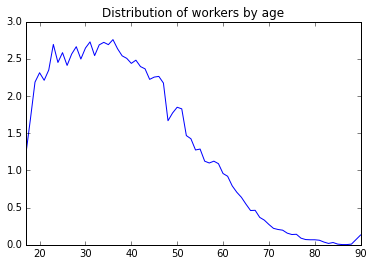

In [22]:
age = inc.age.value_counts()
k = pd.Series(((age/sum(age))*100)).sort_index()
k.plot(title = 'Distribution of workers by age')

In [23]:
inc1 = inc.groupby(['age']).cat.value_counts()
inc2 = inc1.unstack('age').T
inc2.head()

,0,1
age,,
17,395,NaN
18,550,NaN
19,710,2
20,753,NaN
21,717,3


In the following code, i tried to investigate the relationship between age and income being greater or less than 50K. As there are only two income categories, the share of one income category will be a mirror image of another. If an individual is between age 20 and 50, then an increase in age will result in higher chances of belonging to the category of income more than 50K. But after the age of 50, the chances of being in the higher income category will continue to fall.

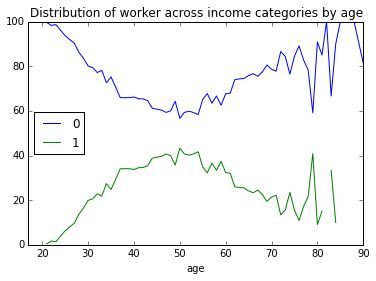

In [24]:
# to calculate the share of income category (i.e. 0 and 1) by age
inc2.apply(lambda c:c/c.sum()*100,axis = 1).plot(title = 'Distribution of worker across income categories by age')

In the following code, i tried to investigate the relationship between age and income being greater or less than 50K.If an individual belong to income category of less than equal to 50k then the higher chances that the age will be between 20 and mid-30. But an individual with income more than 50K, there is a high chance that the age of the individual will above mid-30 and 65.

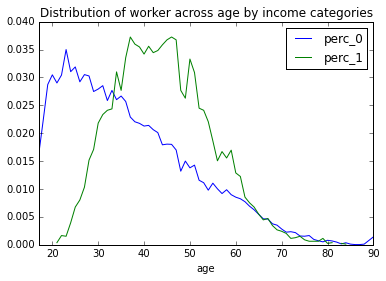

In [25]:
#to calculate the share of different age by income category
inc1 = inc.groupby(['age']).cat.value_counts()
inc2 = inc1.unstack('age').T
inc2['perc_0']= inc2[0]/inc2[0].sum() 
inc2['perc_1']= inc2[1]/inc2[1].sum() 

inc3 = inc2[['perc_0','perc_1']].plot(title = 'Distribution of worker across age by income category')